**Satellite images:** Notebook which demonstrates how to perfom following tasks:
- Obtain images from Sentinel-2 using shapefiles.
- Calculate NDVI index using data from Sentinel-2
- Mask raster using polygons

## Environment Creation with Conda
- conda create -n <name> -c conda-forge python=3.7.7 gdal rasterio pandas
- conda activate <name>
- pip install sentinelsat
- conda install -c conda-forge shapely
- conda install -c conda-forge geopandas    

In [58]:
from sentinelsat import SentinelAPI, geojson_to_wkt
from datetime import date
import pandas as pd
import rasterio as rio
pd.options.display.max_columns = 999

user = 'username'
password = 'password'
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

## Read Shapefile

In [53]:
import folium
import geopandas as gpd
from shapely.geometry import Polygon, MultiPoint

SM = gpd.read_file('mygeodata/EC_rede_geodesica-point.shx')
points = SM['geometry'].tolist()

## Preprocess Shapefile

In [54]:
coords = sum(map(list, (p.coords for p in points)), [])
poly = MultiPoint(coords)
footprint = poly.convex_hull
footprint = Polygon(list(footprint.exterior.coords))

## Display Polygon on Map

In [55]:
m = folium.Map([-29.6914, -53.8008], zoom_start=12)
folium.GeoJson(footprint).add_to(m)
m

## Fetch Sentinel Images based on Polygon

In [56]:
products = api.query(
    footprint,
    date = ('20200610', '20200618'),
    platformname = 'Sentinel-2',
    processinglevel = 'Level-2A',
    cloudcoverpercentage = (0,10)
   )

In [57]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,vegetationpercentage,notvegetatedpercentage,waterpercentage,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage,cloudcoverpercentage,level1cpdiidentifier,format,processingbaseline,platformname,filename,instrumentname,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
558b9b68-ef97-4263-8772-925bd73a16e0,S2A_MSIL2A_20200614T134221_N0214_R124_T21JYH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-14T13:42:21.024Z, Instrument: MS...",2020-06-14 13:42:21.024,2020-06-14 13:42:21.024,2020-06-14 23:49:37.344,26004,124,85.241336,12.051357,0.458668,0.861597,0.005013,0.001772,0.0,0.026858,S2A_OPER_MSI_L1C_TL_SGS__20200614T170153_A0260...,SAFE,02.14,Sentinel-2,S2A_MSIL2A_20200614T134221_N0214_R124_T21JYH_2...,Multi-Spectral Instrument,MSI,1.06 GB,GS2A_20200614T134221_026004_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200614T134221_N0214_R124_T21JYH_2...,558b9b68-ef97-4263-8772-925bd73a16e0,"MULTIPOLYGON (((-54.92902 -29.90247, -53.79303..."
3944eaf5-da83-4ee4-978f-0d7a3cf10655,S2A_MSIL2A_20200614T134221_N0214_R124_T22JBN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-14T13:42:21.024Z, Instrument: MS...",2020-06-14 13:42:21.024,2020-06-14 13:42:21.024,2020-06-14 23:46:00.894,26004,124,82.866591,14.692497,0.357643,0.776478,0.005175,0.002327,0.0,0.036746,S2A_OPER_MSI_L1C_TL_SGS__20200614T170153_A0260...,SAFE,02.14,Sentinel-2,S2A_MSIL2A_20200614T134221_N0214_R124_T22JBN_2...,Multi-Spectral Instrument,MSI,704.09 MB,GS2A_20200614T134221_026004_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200614T134221_N0214_R124_T22JBN_2...,3944eaf5-da83-4ee4-978f-0d7a3cf10655,"MULTIPOLYGON (((-53.54578 -29.89293, -53.51929..."
b376865e-d4ab-43bd-96b6-06dbb2c97a60,S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-16T13:32:29.024Z, Instrument: MS...",2020-06-16 13:32:29.024,2020-06-16 13:32:29.024,2020-06-17 00:38:34.821,17124,81,75.917721,11.897770,1.280295,2.732121,0.183817,0.001011,0.0,4.706542,S2B_OPER_MSI_L1C_TL_SGS__20200616T151015_A0171...,SAFE,02.14,Sentinel-2,S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_2...,Multi-Spectral Instrument,MSI,1.04 GB,GS2B_20200616T133229_017124_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_2...,b376865e-d4ab-43bd-96b6-06dbb2c97a60,"MULTIPOLYGON (((-52.97018 -29.90401, -52.95114..."


## Download Sentinel Image

In [19]:
api.download("558b9b68-ef97-4263-8772-925bd73a16e0")

Downloading: 100%|████████████████████████████████████████████████████████████████| 1.14G/1.14G [04:29<00:00, 4.24MB/s]
MD5 checksumming: 100%|███████████████████████████████████████████████████████████| 1.14G/1.14G [00:12<00:00, 94.9MB/s]


{'id': '558b9b68-ef97-4263-8772-925bd73a16e0',
 'title': 'S2A_MSIL2A_20200614T134221_N0214_R124_T21JYH_20200614T174720',
 'size': 1142959532,
 'md5': '287C94FFB64C4F5FE4DB917DECE650AF',
 'date': datetime.datetime(2020, 6, 14, 13, 42, 21, 24000),
 'footprint': 'POLYGON((-54.948975 -28.91211891833859,-53.823944 -28.890277146686447,-53.79303 -29.879728483832764,-54.929016 -29.90246630612144,-54.948975 -28.91211891833859))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('558b9b68-ef97-4263-8772-925bd73a16e0')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 6, 14, 23, 50, 11, 78000),
 'Ingestion Date': datetime.datetime(2020, 6, 14, 23, 49, 37, 344000),
 'path': '.\\S2A_MSIL2A_20200614T134221_N0214_R124_T21JYH_20200614T174720.zip',
 'downloaded_bytes': 1142959532}

## Load and Plot Image Bands Files

In [28]:
R10 = 'S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_20200616T155741\S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_20200616T155741.SAFE\GRANULE\L2A_T22JBN_A017124_20200616T133227\IMG_DATA\R10m'
b4 = rio.open(R10+'/T22JBN_20200616T133229_B04_10m.jp2', driver='JP2OpenJPEG')
b3 = rio.open(R10+'/T22JBN_20200616T133229_B03_10m.jp2', driver='JP2OpenJPEG')
b2 = rio.open(R10+'/T22JBN_20200616T133229_B02_10m.jp2', driver='JP2OpenJPEG')

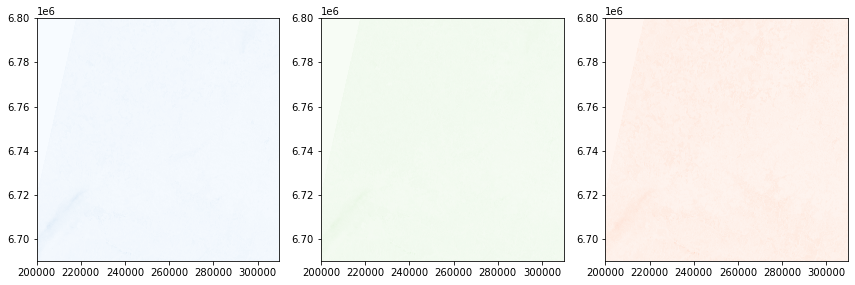

In [29]:
#plot band 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(b2, ax=ax1, cmap='Blues')
plot.show(b3, ax=ax2, cmap='Greens')
plot.show(b4, ax=ax3, cmap='Reds')
fig.tight_layout()

## Compose RGB image based on bands information

In [2]:
# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

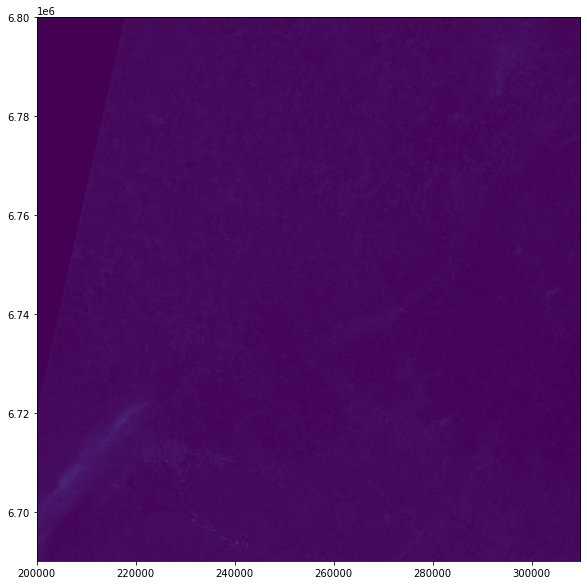

In [17]:
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
src = rio.open(r"RGB.tiff", count=3)
plot.show(src)

## Plotting True Color provided by Sentinel-2

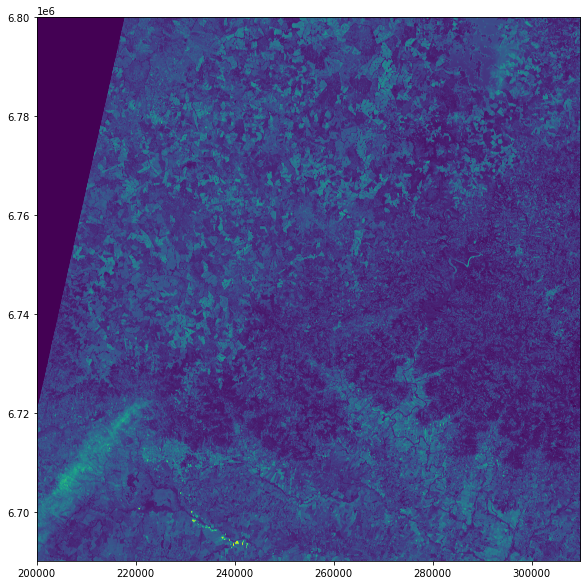

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
true_color = rio.open('S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_20200616T155741\S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_20200616T155741.SAFE\GRANULE\L2A_T22JBN_A017124_20200616T133227\IMG_DATA\R10m\T22JBN_20200616T133229_TCI_10m.jp2', driver='JP2OpenJPEG')
plot.show(true_color)

## NDVI Composition

In [46]:
# Open b4 and b8
b4 = rio.open(R10+'/T22JBN_20200616T133229_B04_10m.jp2')
b8 = rio.open(R10+'/T22JBN_20200616T133229_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))

NameError: name 'R10' is not defined

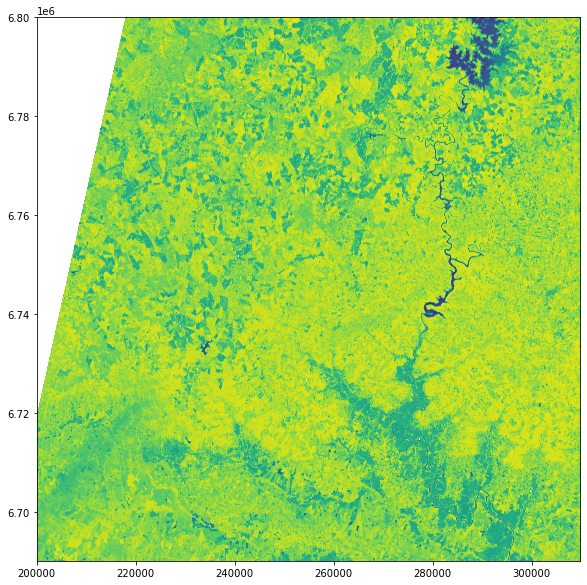

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
true_color = rio.open('NDVI.tif')
plot.show(true_color)

## Reprojection Image

In [48]:
localname = 'S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_20200616T155741\S2B_MSIL2A_20200616T133229_N0214_R081_T22JBN_20200616T155741.SAFE\GRANULE\L2A_T22JBN_A017124_20200616T133227\IMG_DATA\R10m\T22JBN_20200616T133229_TCI_10m.jp2'
tifname = 'TCI.tiff'

dst_crs = 'EPSG:4326'

with rasterio.open(localname) as src:
    profile = src.profile.copy()

    transform, width, height = rasterio.warp.calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)

    profile.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(tifname, 'w', **profile) as dst:
        rasterio.warp.reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=rasterio.warp.Resampling.bilinear)

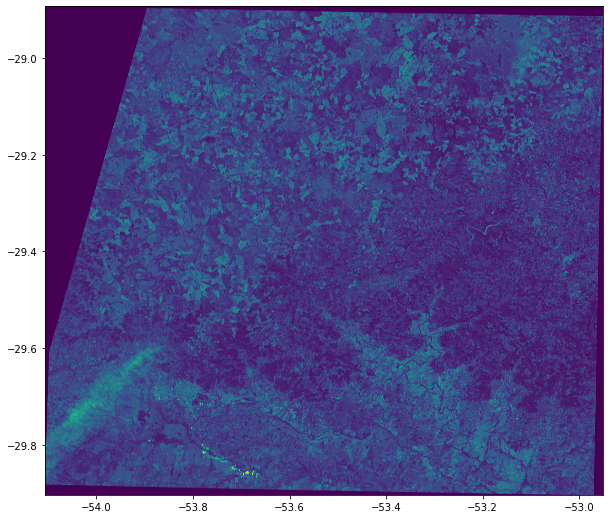

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
src = rio.open(r'TCI.tiff', count=3)
plot.show(src)

## Clip Image

### Save polygon as shapefile

In [42]:
from shapely.geometry import mapping, Polygon
import fiona

# Here's an example Shapely geometry
poly = test_polygon

# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}

# Write a new Shapefile
with fiona.open('my_shp2.shp', 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(poly),
        'properties': {'id': 123},
    })

### Mask raster with shapefile and image

In [50]:
import fiona
with fiona.open('my_shp2.shp', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
with rasterio.open('TCI.tiff') as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
    
with rio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

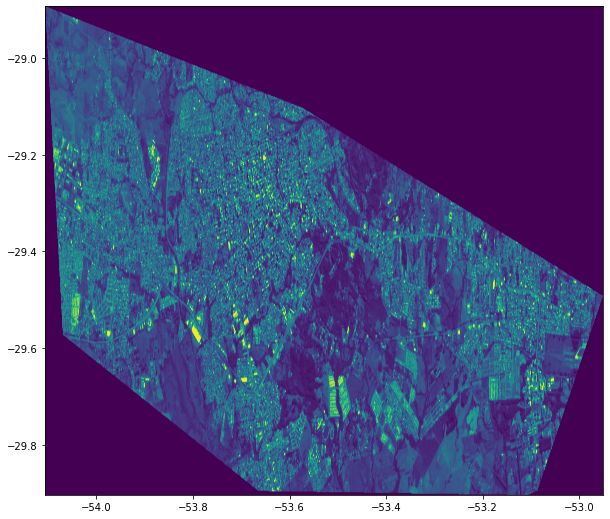

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
src = rio.open(r'RGB_masked.tif')
plot.show(src)